#### `Import Libraries`

In [55]:
# Importing libraries for data manipulation, visualization, and machine learning
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import joblib
# Library for visualizing missing values
import missingno 
# Importing machine learning utilities from scikit-learn
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline  
from sklearn.neural_network import MLPClassifier  
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
## importing smote 
from imblearn.over_sampling import SMOTE

#### `Read Data`

In [56]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### `Data Cleaning`

In [57]:
df.shape

(1470, 35)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [59]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [60]:
## Check nulls 

df.isna().sum().sort_values(ascending=False)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

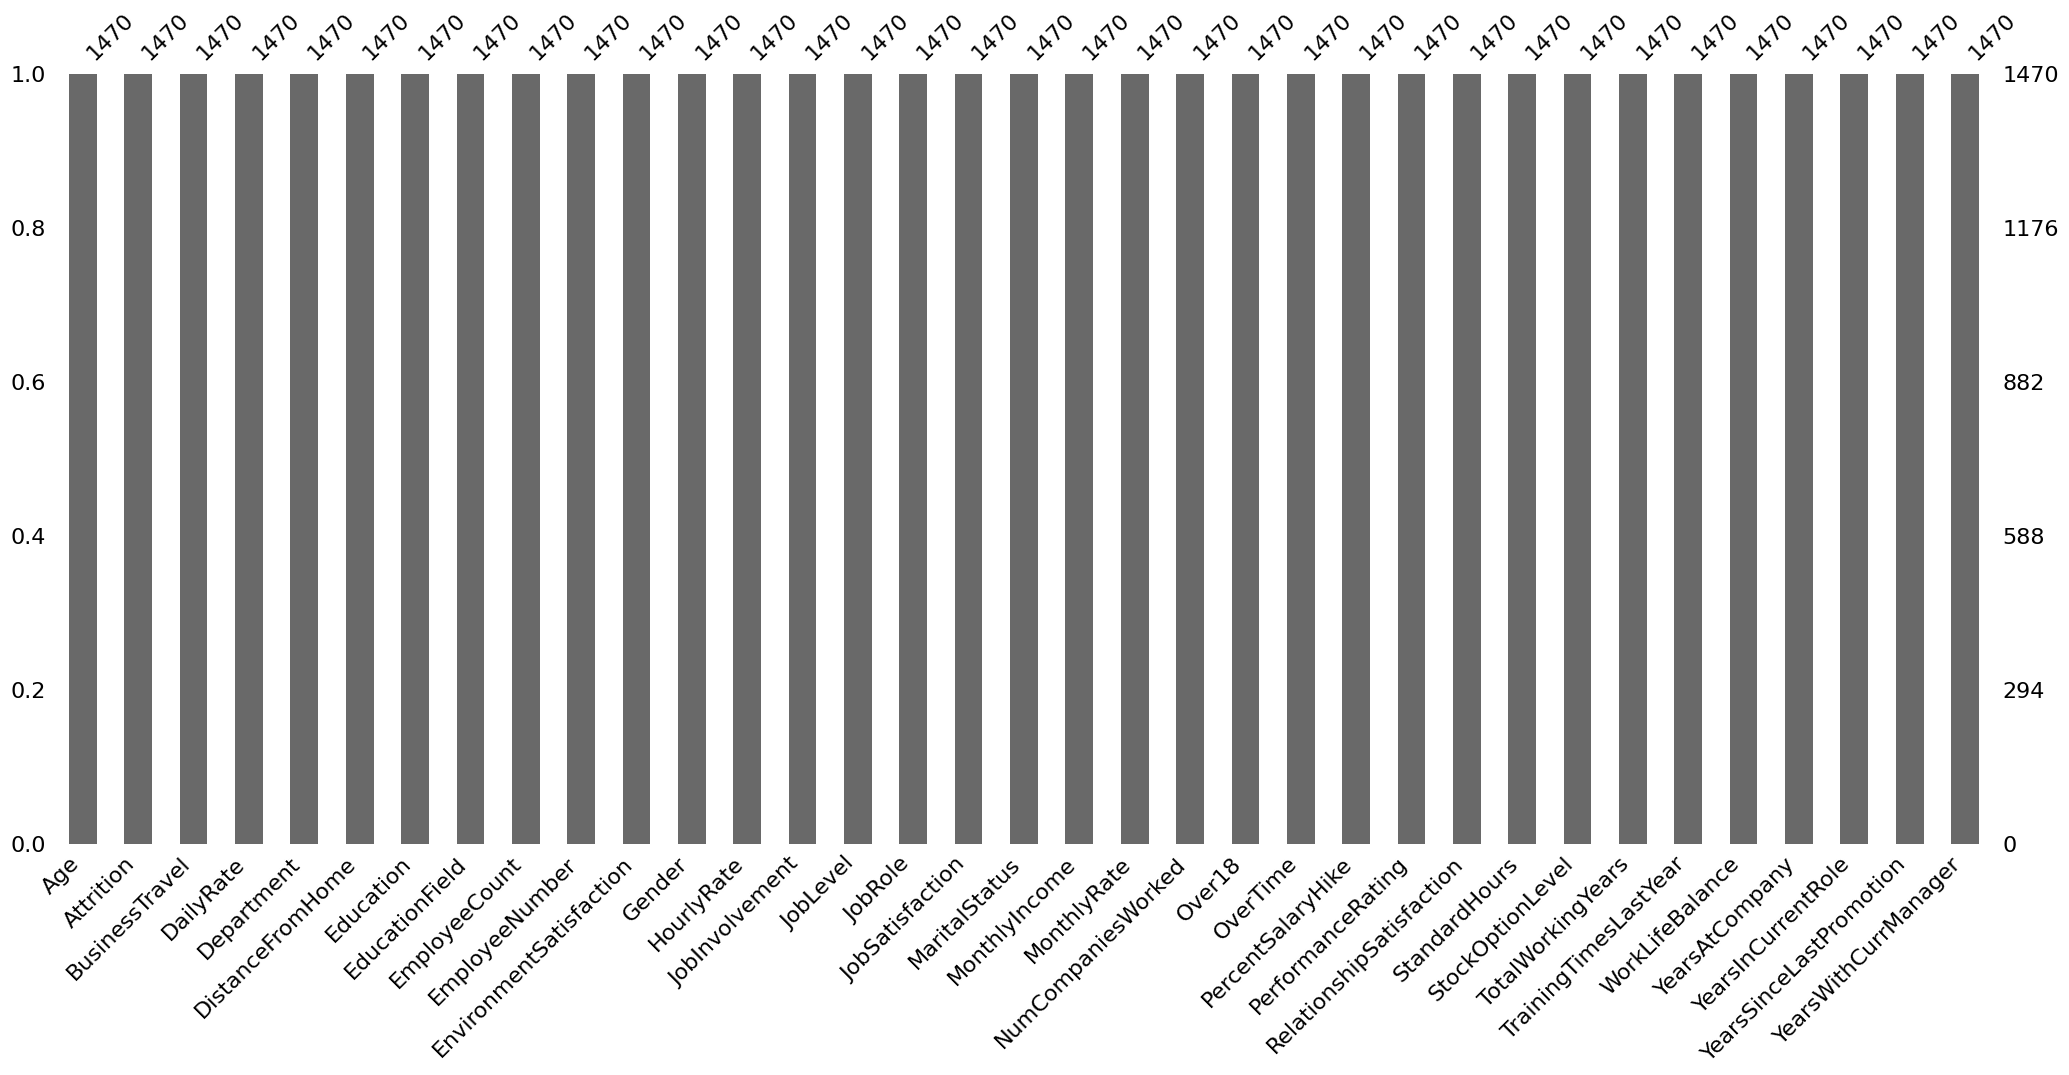

In [61]:
missingno.bar(df)
plt.show()

In [62]:
## check duplicates
df.duplicated().sum()

np.int64(0)

#### `EDA & Viz`

##### 1-What is the distribution of the target variable (Attrition)?

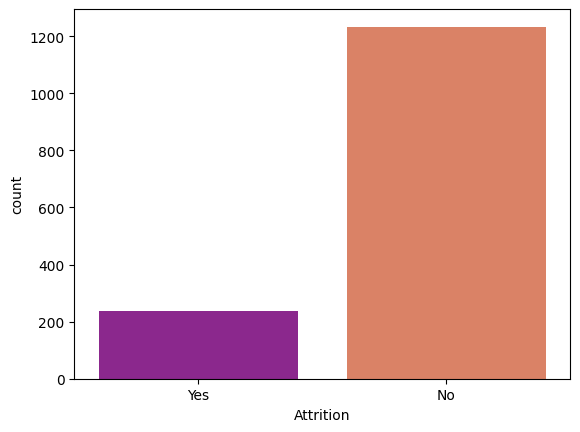

In [63]:
sns.countplot(x='Attrition', data=df,palette='plasma',hue='Attrition')
plt.show()

In [64]:
# Count of target variable 'Attrition'
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

##### 2-What is the average satisfaction level (JobSatisfaction, EnvironmentSatisfaction) for employees who left?


In [65]:
# Grouping by Attrition and calculating mean satisfaction levels
satisfaction_means = df.groupby("Attrition")[["JobSatisfaction", "EnvironmentSatisfaction"]].mean()
satisfaction_means


,JobSatisfaction,EnvironmentSatisfaction
Attrition,,
No,2.778589,2.771290
Yes,2.468354,2.464135


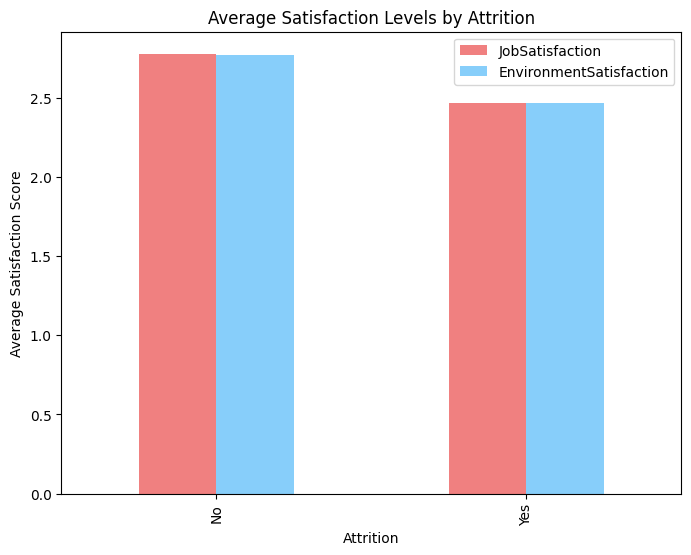

In [66]:
# Barplot
satisfaction_means.plot(kind="bar", figsize=(8, 6), color=["lightcoral", "lightskyblue"])
plt.title("Average Satisfaction Levels by Attrition")
plt.ylabel("Average Satisfaction Score")
plt.show()


##### 3-Common education levels

In [67]:
df['Education'].value_counts().sort_values(ascending=False)

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

4-Median monthly income by job level

In [68]:
df.groupby('JobLevel')['MonthlyIncome'].median().sort_values(ascending=False)


JobLevel
5    19232.0
4    16154.0
3     9980.0
2     5340.0
1     2670.0
Name: MonthlyIncome, dtype: float64

##### 5-What is the relationship between Attrition and DistanceFromHome?

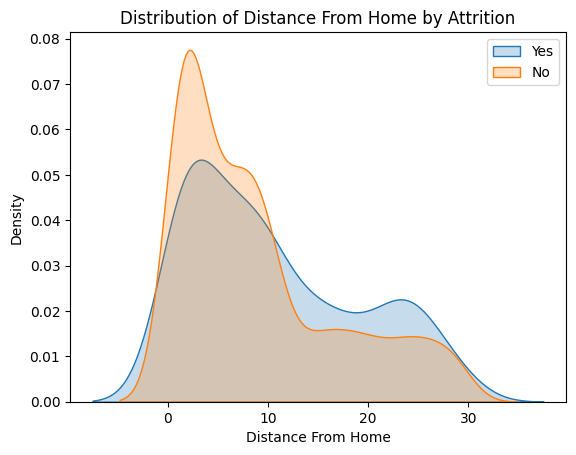

In [69]:
# KDE Plot for DistanceFromHome
sns.kdeplot(data=df[df["Attrition"] == "Yes"]["DistanceFromHome"], label="Yes",fill=True)
sns.kdeplot(data=df[df["Attrition"] == "No"]["DistanceFromHome"], label="No",fill=True)
plt.title("Distribution of Distance From Home by Attrition")
plt.xlabel("Distance From Home")
plt.ylabel("Density")
plt.legend()
plt.show()


##### `Detect Outliers`

In [70]:
num_col=df.select_dtypes(include=['float64','int64']).columns

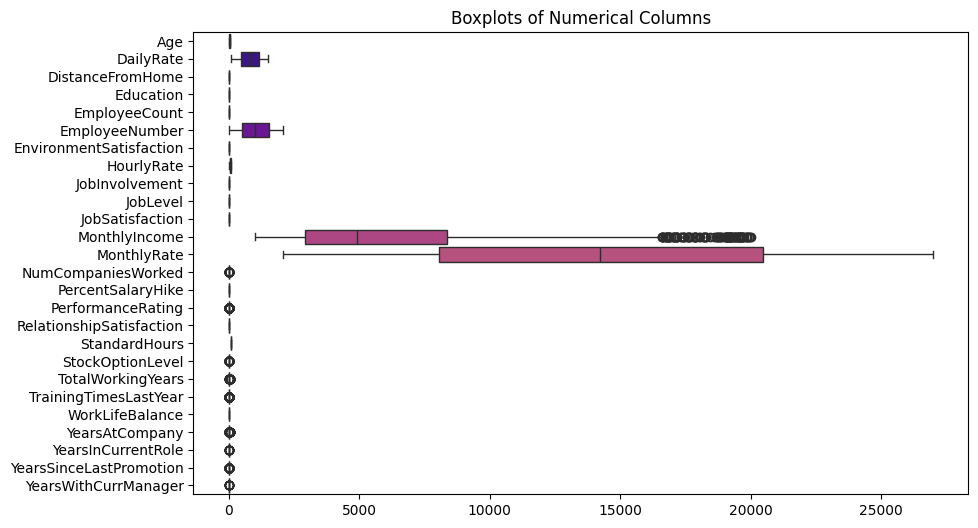

In [71]:
## Detect Outliers for num cols
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_col], orient='h', palette='plasma')
plt.title("Boxplots of Numerical Columns")
plt.show()

In [72]:
## Detect Outlier using datasist 
from datasist.structdata import detect_outliers 

In [73]:
for col in num_col:
    # Detect outliers
    idx = detect_outliers(data=df, n=0, features=[col])
    if len(idx) > 10:  
        df.loc[idx, col] = df[col].median()  # Replace outlier rows with the median


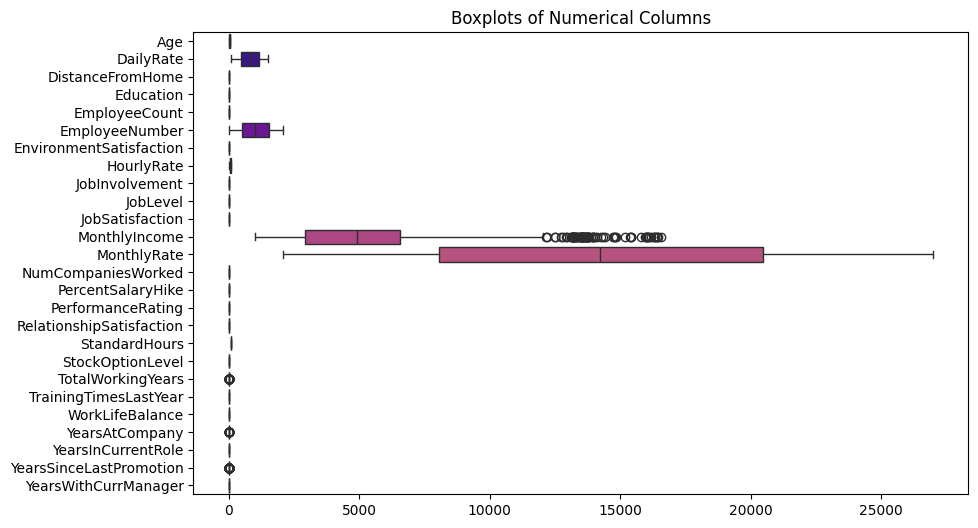

In [74]:
## Check After Handle Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_col], orient='h', palette='plasma')
plt.title("Boxplots of Numerical Columns")
plt.show()

In [75]:
# Drop columns likely irrelevant for the model
irrelevant_cols = ["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount","HourlyRate"]
df.drop(columns=irrelevant_cols,inplace=True)


#### `Split Dataset`

In [76]:
## Features, target
X = df.drop(columns='Attrition', axis=1)
y = df['Attrition']

In [77]:
## split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45)

In [78]:
## Check shapes

print('x_trian shape :',X_train.shape)
print('y_trian shape :',y_train.shape)
print('x_test shape :',X_test.shape)
print('y_test shape :',y_test.shape)

x_trian shape : (1176, 29)
y_trian shape : (1176,)
x_test shape : (294, 29)
y_test shape : (294,)


In [79]:
joblib.dump(X_train.columns,'input.pkl')

['input.pkl']

In [80]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### `Preprocessing`

In [81]:
numerical_columns = X_train.select_dtypes(include=['float64','int64']).columns
categorical_columns=X_train.select_dtypes(include='object').columns

In [82]:
print('Num cols : ', numerical_columns)
print('Categ Cols :', categorical_columns)

Num cols :  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
Categ Cols : Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
# Numerical Pipeline
num_pipeline = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Categorical Pipeline
categ_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='first'))
])

# Combine numerical and categorical pipelines using ColumnTransformer
total_pipeline = ColumnTransformer(transformers=[
    ('num_pipe', num_pipeline, numerical_columns),
    ('categ_pipe', categ_pipeline, categorical_columns)
])

MLP_pipeline = Pipeline(steps=[
    ('preprocessor', total_pipeline),
    ('classifier', MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', max_iter=500, random_state=42))
])

LR_pipeline=Pipeline(steps=[
    ('preprocessor',total_pipeline),
    ('classifier',LogisticRegression(random_state=42))
])

final_pipeline = Pipeline(steps=[
    ('preprocessor', total_pipeline),  # ColumnTransformer
    ('classifier', RandomForestClassifier(random_state=42))
])


In [85]:
X_train_final=total_pipeline.fit_transform(X_train)
X_test_final=total_pipeline.transform(X_test)

In [86]:
X_train_final

array([[0.28571429, 0.14531138, 0.53571429, ..., 1.        , 0.        ,
        0.        ],
       [0.42857143, 0.06156049, 0.21428571, ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.8138869 , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.73809524, 0.77451682, 0.35714286, ..., 1.        , 0.        ,
        0.        ],
       [0.14285714, 0.9634932 , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.78571429, 0.93271296, 0.35714286, ..., 0.        , 1.        ,
        0.        ]])

#### `Genetic Algorithm`

In [88]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define fitness function
def fitness(features):
    selected_features = [index for index, bit in enumerate(features) if bit == 1]

    if len(selected_features) == 0:
        return 0.0

    X_train_subset = X_train_final[:, selected_features]
    X_test_subset = X_test_final[:, selected_features]

    model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
    model.fit(X_train_subset, y_train)
    return model.score(X_test_subset, y_test)


In [89]:
# Parameters
population_size = 50
generations = 30
mutation_rate = 0.1


In [90]:

# Initialize population
n_features = X_train_final.shape[1]
population = np.random.randint(2, size=(population_size, n_features))

# Evaluate initial population
fitness_scores = [fitness(individual) for individual in population]


In [91]:
# Genetic Algorithm
for generation in range(generations):
    # Selection (roulette wheel selection based on fitness scores)
    fitness_probabilities = fitness_scores / np.sum(fitness_scores)
    parent_indices = np.random.choice(population_size, size=population_size, p=fitness_probabilities)
    parents = population[parent_indices]

    # Crossover
    children = np.empty_like(parents)
    for i in range(population_size):
        parent1 = parents[i]
        parent2 = parents[np.random.randint(population_size)]
        crossover_point = np.random.randint(1, n_features - 1)
        children[i] = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))

    # Mutation
    for i in range(population_size):
        if np.random.rand() < mutation_rate:
            mutation_point = np.random.randint(n_features)
            children[i, mutation_point] = 1 - children[i, mutation_point]

    # Evaluate new population
    population = children
    fitness_scores = [fitness(individual) for individual in population]

In [92]:
# Select the best individual
best_individual = population[np.argmax(fitness_scores)]
selected_features = [index for index, bit in enumerate(best_individual) if bit == 1]

In [93]:
# Final model training and evaluation
X_train_selected = X_train_final[:, selected_features]
X_test_selected = X_test_final[:, selected_features]

final_model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
final_model.fit(X_train_selected, y_train)
final_predictions = final_model.predict(X_test_selected)

final_accuracy = accuracy_score(y_test, final_predictions)

print("Selected Features:", selected_features)
print("Final Accuracy:", final_accuracy)


Selected Features: [2, 7, 8, 9, 10, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 30, 33, 34, 36, 37, 39, 40, 41, 42]
Final Accuracy: 0.826530612244898


###  `Implement Models Without GA`

* `Implement MLP Model Without SMOTE`

In [94]:
# Train the pipeline
MLP_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'Relationsh...
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                                 ('categ_pipe',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500,
                               random_state=42))])

In [95]:
# Predict with the pipeline
y_pred = MLP_pipeline.predict(X_test)

In [96]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")

Accuracy on test data: 0.8435


* `Implement MLP Model With SMOTE`

In [97]:
## Target
df['Attrition'].value_counts(normalize=True)  ## Imbalanced Dataset



Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

In [98]:
over = SMOTE(sampling_strategy=0.7)
X_train_resampled, y_train_resampled = over.fit_resample(X_train_final, y_train)  ## for train

y_train_resampled.value_counts(), y_train.value_counts()

(Attrition
 No     996
 Yes    697
 Name: count, dtype: int64,
 Attrition
 No     996
 Yes    180
 Name: count, dtype: int64)

In [99]:
# Initialize MLPClassifier
mlp2= MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu' , solver='adam' , max_iter=500, random_state=42)

# Train the model
mlp2.fit(X_train_resampled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)

In [100]:
# Accuracy on test data
y_test_pred = mlp2.predict(X_test_final)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")

Accuracy on test data: 0.8299


* `Implement Logistic Regression`

In [101]:
LR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'Relationsh...
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                                 ('categ_pipe',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [102]:
# Predict on the train set
y_pred = LR_pipeline.predict(X_train)

# Train Accuracy
train_accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy on train data: {train_accuracy:.4f}")

Accuracy on train data: 0.8954


In [103]:
# Predict on the test set
y_pred = LR_pipeline.predict(X_test)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")

Accuracy on test data: 0.8741


###  `Implement Model With GA`

* `Implement MLP Model `

In [104]:
mlp=MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_selected,y_train)

c:\Users\20100\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)

In [105]:
y_test_pred=mlp.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")

Accuracy on test data: 0.7993


* `Implement Logistic Regression Model`

In [106]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train_selected,y_train)

LogisticRegression(random_state=42)

In [107]:
y_test_pred=lr.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test data: {test_accuracy:.4f}")

Accuracy on test data: 0.8673


In [108]:
# Save the preprocessing pipeline
joblib.dump(total_pipeline,"final_pipeline.pkl")

# Save the trained model
joblib.dump(lr, "LR.pkl")

['LR.pkl']